# Import Libraries and Dependencies

Import Libraries such as pandas and numpy and datetime for converting date time for date

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load dataset
Load the dataset House_Price.csv and inspect the data set

In [ ]:
df = pd.read_csv('House_Price.csv')
print("Dataset Rows Count: ", df.shape[0], "\nDateset Column Count: ", df.shape[1])

Dataset Rows Count:  4600 
Dateset Column Count:  18


In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# DISTRIBUTION AND SKEWNESS

Determine the skewedness distribution of each features. Such as (price, bedroom, bathroom, view, condition,sqrft lot, sqrft living, etc.)

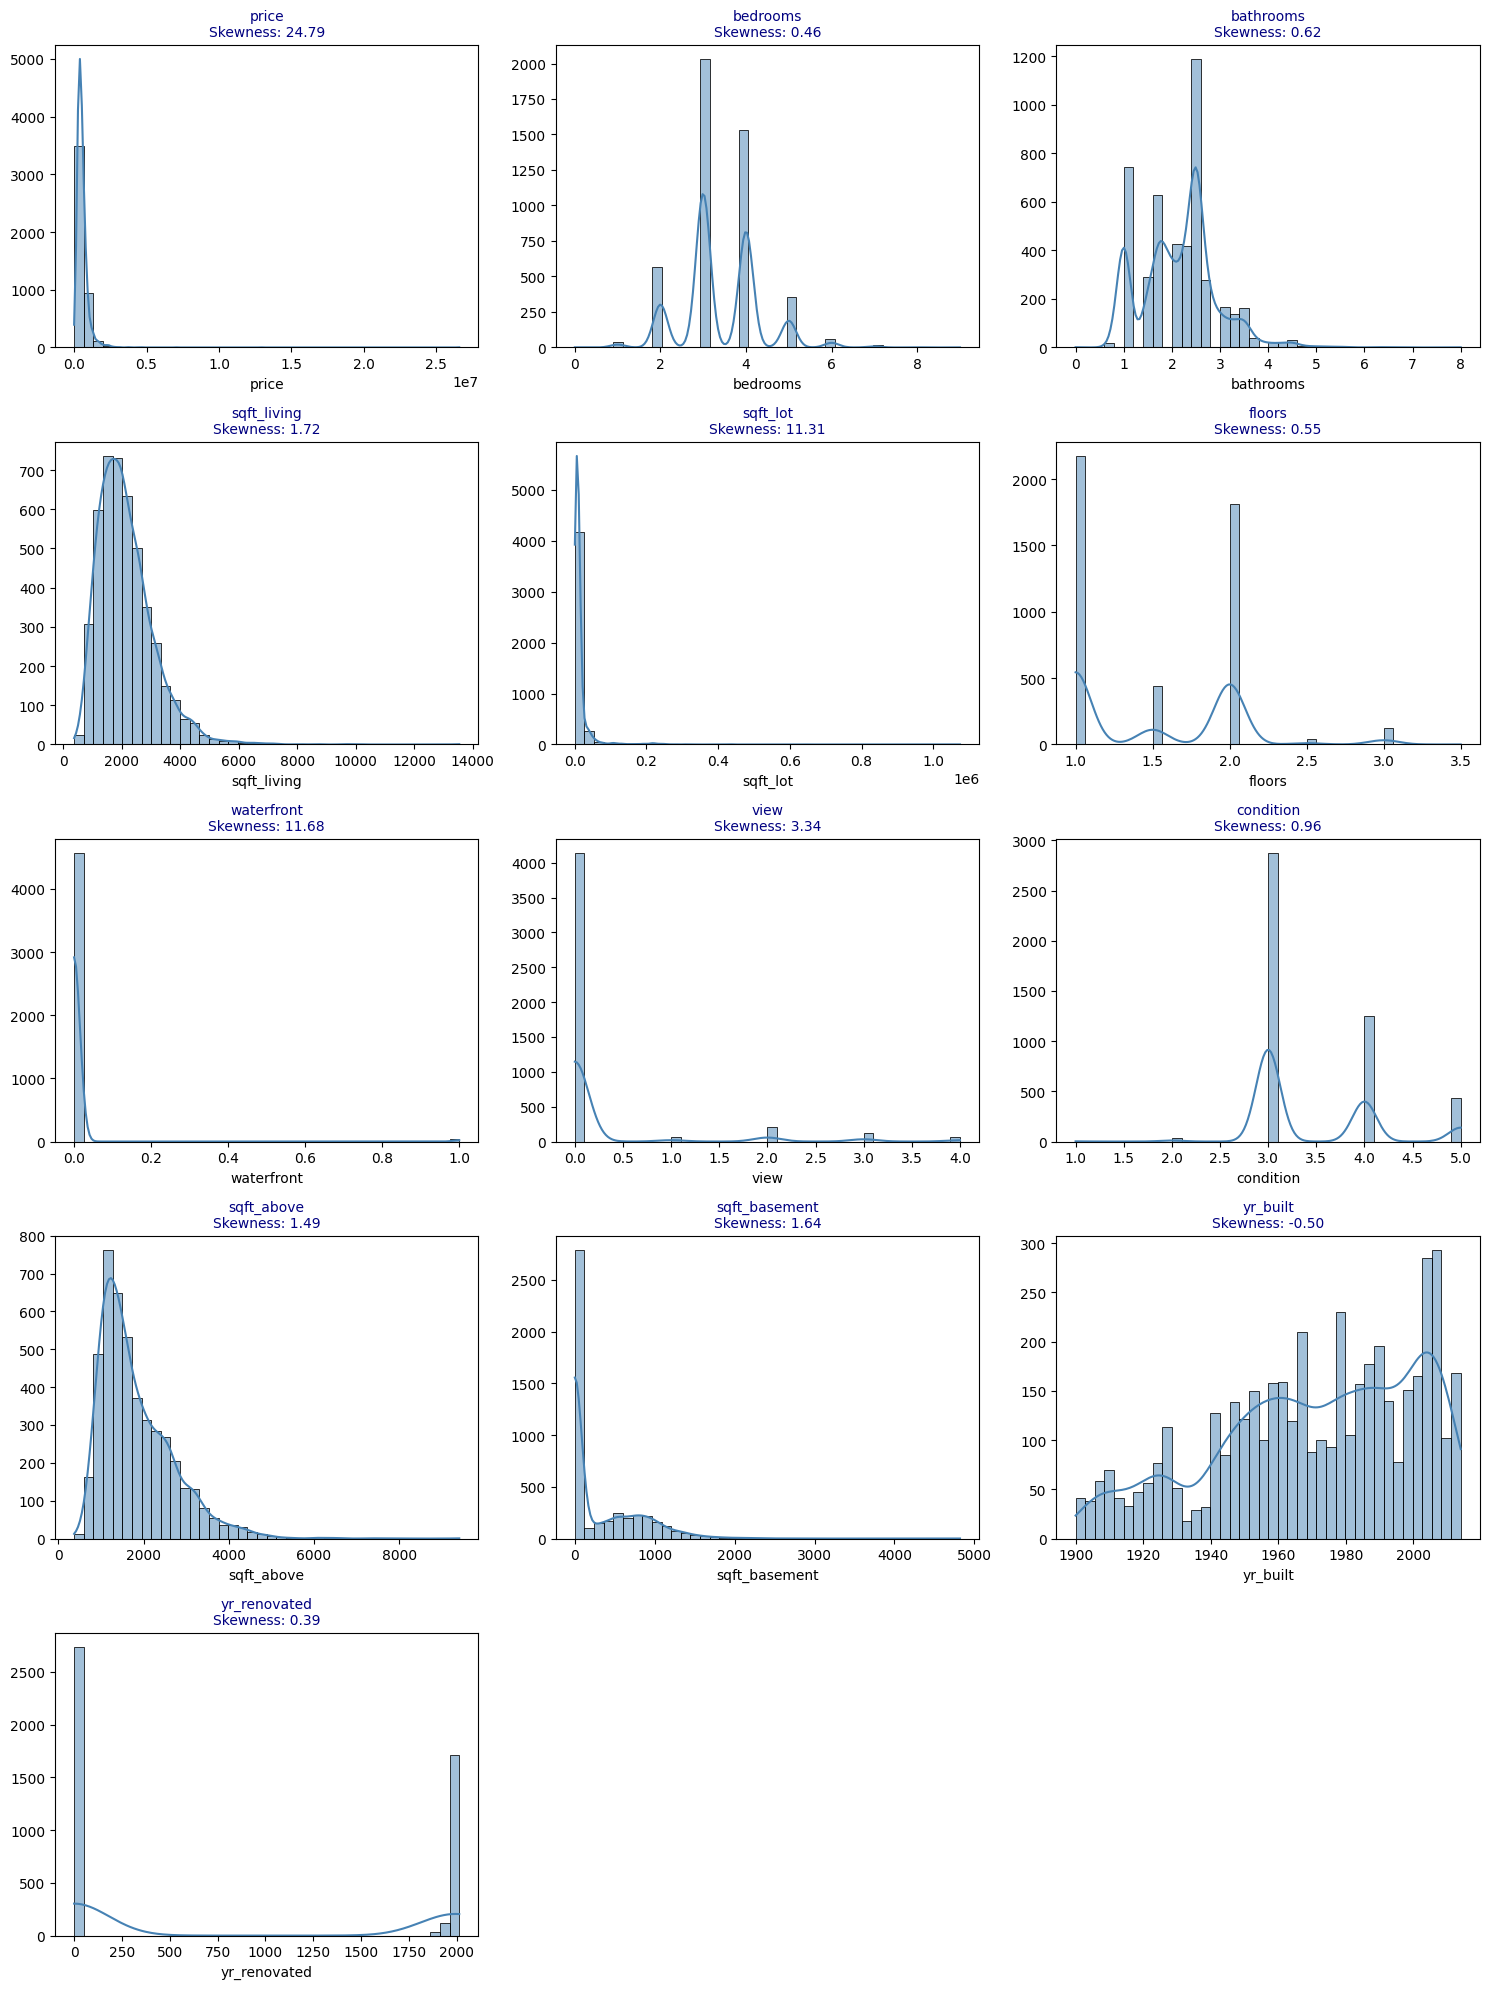

In [ ]:
import math

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Determine grid size
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create figure
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through columns and create subplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.histplot(
        df[col],
        bins=40,
        kde=True,
        color="steelblue",
        edgecolor="black",
        line_kws={"color": "navy"} # Corrected from kde_kws to line_kws
    )

    skew_val = df[col].skew()
    plt.title(f"{col}\nSkewness: {skew_val:.2f}", fontsize=10, color="navy")
    plt.xlabel(col)
    plt.ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

# 1. DATA PREPROCESSING

*   Convert date to datetime
*   Sort by date for time-based split
*   Handle Price Outliers (cap at 99th percentile)
*   Create Price Categories (4 categories using quantiles)





Convert date into datetime and sort the value

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

Get the 99 percentile of price to get the Max price before and after capping

In [ ]:
price_99_percentile = df['price'].quantile(0.99)
print(f"99th percentile price: ${price_99_percentile:,.2f}")
print(f"Max price before capping: ${df['price'].max():,.2f}")

df['price'] = np.where(df['price'] > price_99_percentile, price_99_percentile, df['price'])
print(f"Max price after capping: ${df['price'].max():,.2f}")

99th percentile price: $2,005,220.00
Max price before capping: $26,590,000.00
Max price after capping: $2,005,220.00


Clasify or Categorize the prize into Budget, Affordable, Premium and Luxury to get the price range.


In [ ]:
df['price_category'] = pd.qcut(df['price'], q=4, labels=['Affordable', 'Budget', 'Premium', 'Luxury'])
print("\nPrice Category Distribution:")
print(df['price_category'].value_counts())
print("\nPrice ranges for each category:")
for category in ['Affordable', 'Budget', 'Premium', 'Luxury']:
    min_price = df[df['price_category'] == category]['price'].min()
    max_price = df[df['price_category'] == category]['price'].max()
    print(f"{category}: ${min_price:,.2f} - ${max_price:,.2f}")


Price Category Distribution:
price_category
Budget        1150
Affordable    1150
Premium       1150
Luxury        1150
Name: count, dtype: int64

Price ranges for each category:
Budget: $0.00 - $322,500.00
Affordable: $323,000.00 - $460,886.92
Premium: $461,000.00 - $654,950.00
Luxury: $655,000.00 - $2,005,220.00


# Feature Engineering

Make a new column for prediction purpose

Feature Selection and Data Cleaning

*   House_age       - for how old is the house
*   is_renovated    - if the house have been renovated
*   price_per_sqft  - for price per square feet
*   total_rooms     - total for bedroom and bathroom
*   sqft_ratio      - Square feet ratio
*   has_basement    - if the house has basement






In [ ]:
df['house_age'] = 2014 - df['yr_built']
df['is_renovated'] = (df['yr_renovated'] > 0).astype(int)
df['price_per_sqft'] = df['price'] / df['sqft_living']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['sqft_ratio'] = df['sqft_living'] / (df['sqft_lot'] + 1)  # +1 to avoid division by zero
df['has_basement'] = (df['sqft_basement'] > 0).astype(int)

# Drop unnecessary columns
Drop column such as country, street, city, statezip, date, year built and year renovated. We modify the date, year built and year renovated so we need to drop it.

In [ ]:
columns_to_drop = ['country', 'street', 'city', 'statezip', 'date', 'yr_built', 'yr_renovated']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(f"\nOriginal features: {len(df.columns)}")
print(f"After cleaning: {len(df_cleaned.columns)}")
print("\nRemaining features:", df_cleaned.columns.tolist())


Original features: 25
After cleaning: 18

Remaining features: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'price_category', 'house_age', 'is_renovated', 'price_per_sqft', 'total_rooms', 'sqft_ratio', 'has_basement']



# SAVE FEATURE COLUMNS FOR STREAMLIT
Save feature column without this the streamlit will have problem in matching our input house details.

In [ ]:
import joblib
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

cols = joblib.load("feature_columns.pkl")
print(cols)

# 2. PREPARE FEATURES & TARGET
In these we need to prepare features for our prediction and split the target data. Which is price from other column and convert data into numerical data.
*   Save the label encoder for later use






Separate features and target

In [ ]:
columns_to_drop_from_X = [
    'price_category', # Target variable
    'price',          # Original target, not a feature for classification
    'price_per_sqft', # Derived from price, not a feature for classification
    'date',           # Timestamp objects, non-numerical, needs to be dropped
    'yr_built',       # Replaced by 'house_age', needs to be dropped
    'yr_renovated',   # Replaced by 'is_renovated', needs to be dropped
    'country',        # Non-numerical, needs to be dropped
    'street',         # Non-numerical, needs to be dropped
    'city',           # Non-numerical, needs to be dropped
    'statezip'        # Non-numerical, needs to be dropped
]

# First, drop the identified columns
X_temp = df.drop(columns=columns_to_drop_from_X, errors='ignore')

# Then, ensure X only contains numeric columns, as a safeguard
# This step will remove any lingering non-numeric columns if the drop failed for some reason
X = X_temp.select_dtypes(include=np.number)

y = df['price_category']

# Verify X is purely numerical
print("X DataFrame info after processing:")
X.info()
print("\nColumns in X:", X.columns.tolist())

X DataFrame info after processing:
<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4600 non-null   float64
 1   bathrooms      4600 non-null   float64
 2   sqft_living    4600 non-null   int64  
 3   sqft_lot       4600 non-null   int64  
 4   floors         4600 non-null   float64
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  house_age      4600 non-null   int64  
 11  is_renovated   4600 non-null   int64  
 12  total_rooms    4600 non-null   float64
 13  sqft_ratio     4600 non-null   float64
 14  has_basement   4600 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 575.0 KB

Columns in X: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_

Convert target to numerical labels and save it.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("\nClass mapping:")
for i, category in enumerate(le.classes_):
    print(f"{i}: {category}")

import joblib
joblib.dump(le, 'label_encoder.pkl')

Feature shape: (4600, 22)
Target shape: (4600,)

Class mapping:
0: Affordable
1: Budget
2: Luxury
3: Premium


['label_encoder.pkl']

3. TIME-BASED TRAIN-TEST SPLIT (70-30)
Since the date is already sorted. Now we need to Train 70% of the data and Test 30% of it and Split.

In [ ]:
split_idx = int(len(X) * 0.7)

X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y_encoded[:split_idx]
y_test = y_encoded[split_idx:]

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"\nTesting class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

Training set: 3220 samples (70.0%)
Testing set: 1380 samples (30.0%)

Training class distribution:
0    806
1    795
2    790
3    829
Name: count, dtype: int64

Testing class distribution:
0    344
1    355
2    360
3    321
Name: count, dtype: int64


# 4. SCALING/NORMALIZATION
Using the sklearn we need to use the StadardScaler dependency to scale and normalize our train and test data. And save the scaled data.

Scale numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")

Scaling completed!


Save the scaler for later use

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

print("Scaling completed!")
print(f"Training shape: {X_train_scaled.shape}")
print(f"Testing shape: {X_test_scaled.shape}")

Scaling completed!
Training shape: (3220, 15)
Testing shape: (1380, 15)


# 5. MULTIPLE MODEL TRAINING & COMPARISON
We use multiple model to train and to compare each model which is better for House Price Prediction Model. We use Logistic Regression, Random Forest, XGBoost,  Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Neutral Network Algorithms

Train with timing

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n{'='*100}")
    print(f"Training {name}...")

    # Train with timing
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Predict with timing
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    predict_time = time.time() - start_time

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Training Time (s)': train_time,
        'Prediction Time (s)': predict_time
    })

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training Time: {train_time:.4f}s")
    print(f"Prediction Time: {predict_time:.4f}s")

    # Detailed classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))


Training Logistic Regression...
Accuracy: 0.5333
Training Time: 0.0557s
Prediction Time: 0.0007s

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  Affordable       0.42      0.26      0.32       344
      Budget       0.57      0.67      0.61       355
      Luxury       0.71      0.73      0.72       360
     Premium       0.39      0.46      0.42       321

    accuracy                           0.53      1380
   macro avg       0.52      0.53      0.52      1380
weighted avg       0.53      0.53      0.52      1380


Training Random Forest...
Accuracy: 0.5217
Training Time: 0.8799s
Prediction Time: 0.0326s

Classification Report for Random Forest:
              precision    recall  f1-score   support

  Affordable       0.41      0.35      0.38       344
      Budget       0.60      0.59      0.60       355
      Luxury       0.65      0.72      0.69       360
     Premium       0.38      0.40      0.39       321

    accuracy 

6. VISUALIZE RESULTS
Show Visual Graph about:

*   Accuracy Comparison
*   F1-Score Comparison

*   Training Time Comparison
*   Precision-Recall Comparison

*   Prediction Time Comparison
*   Radar Chart for multi-metric comparison








Visual Graph for Accuracy Comparison

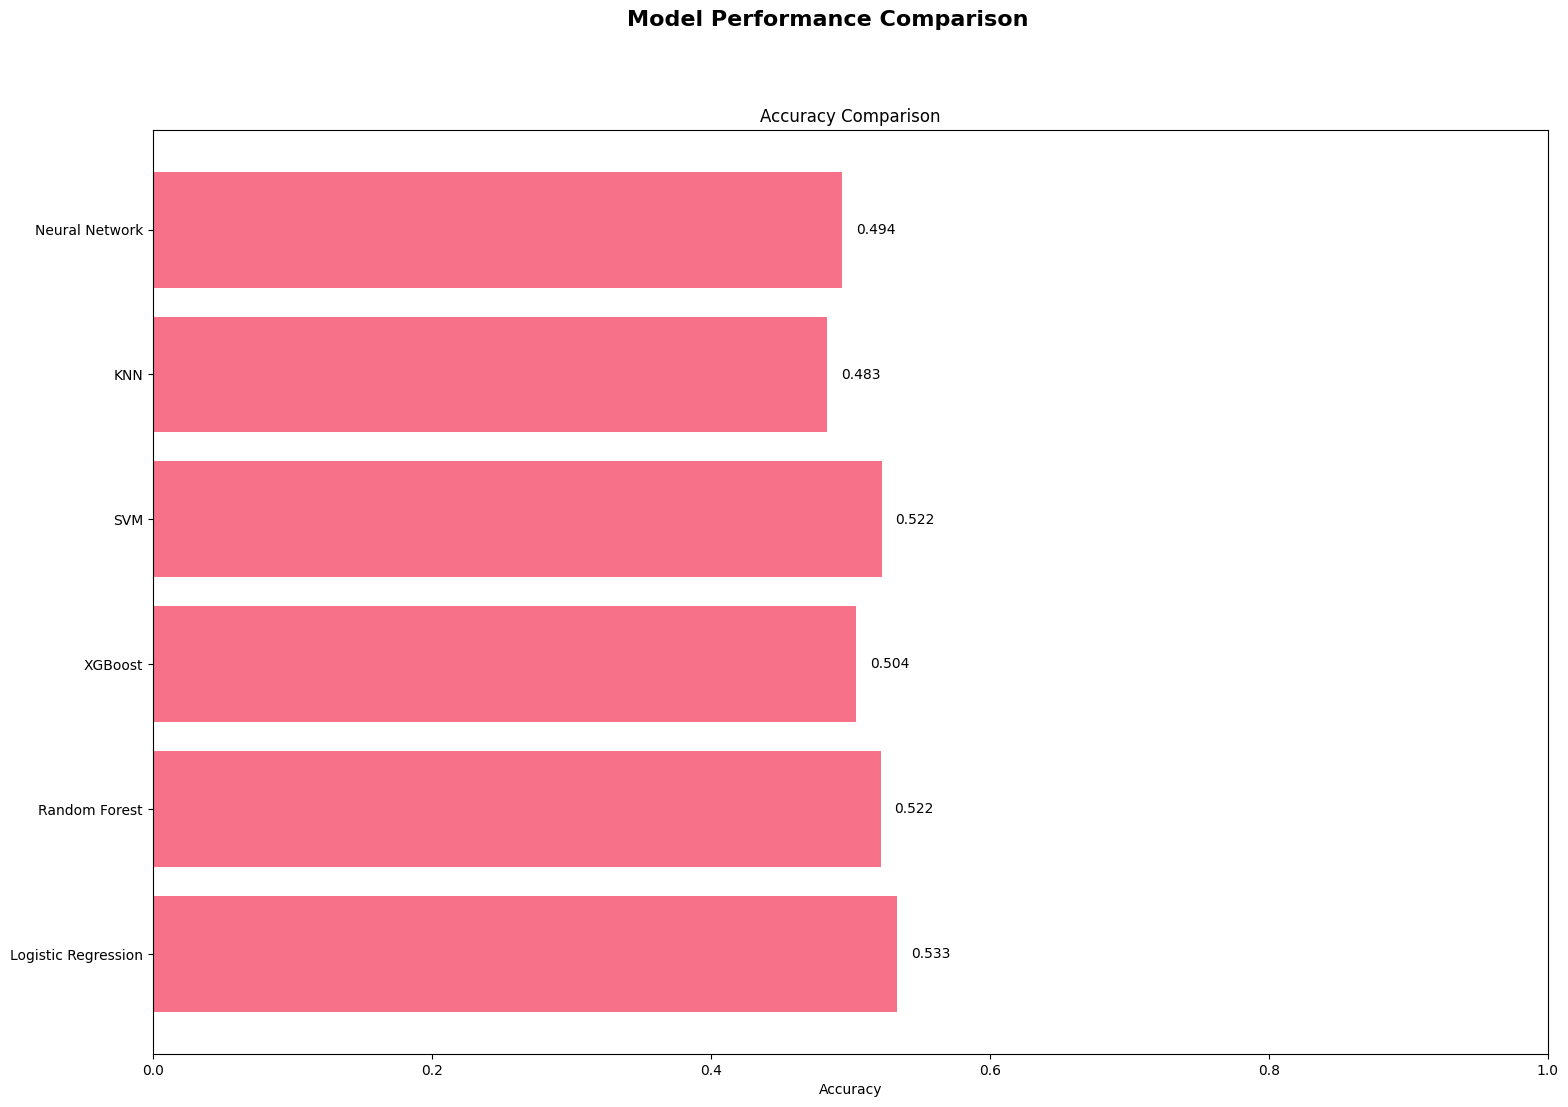

In [ ]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax1 = plt.subplots(1, 1, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. Accuracy Comparison
bars1 = ax1.barh(results_df['Model'], results_df['Accuracy'])
ax1.set_xlabel('Accuracy')
ax1.set_title('Accuracy Comparison')
ax1.set_xlim([0, 1])
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

Visual Graph for F1-Score Comparison

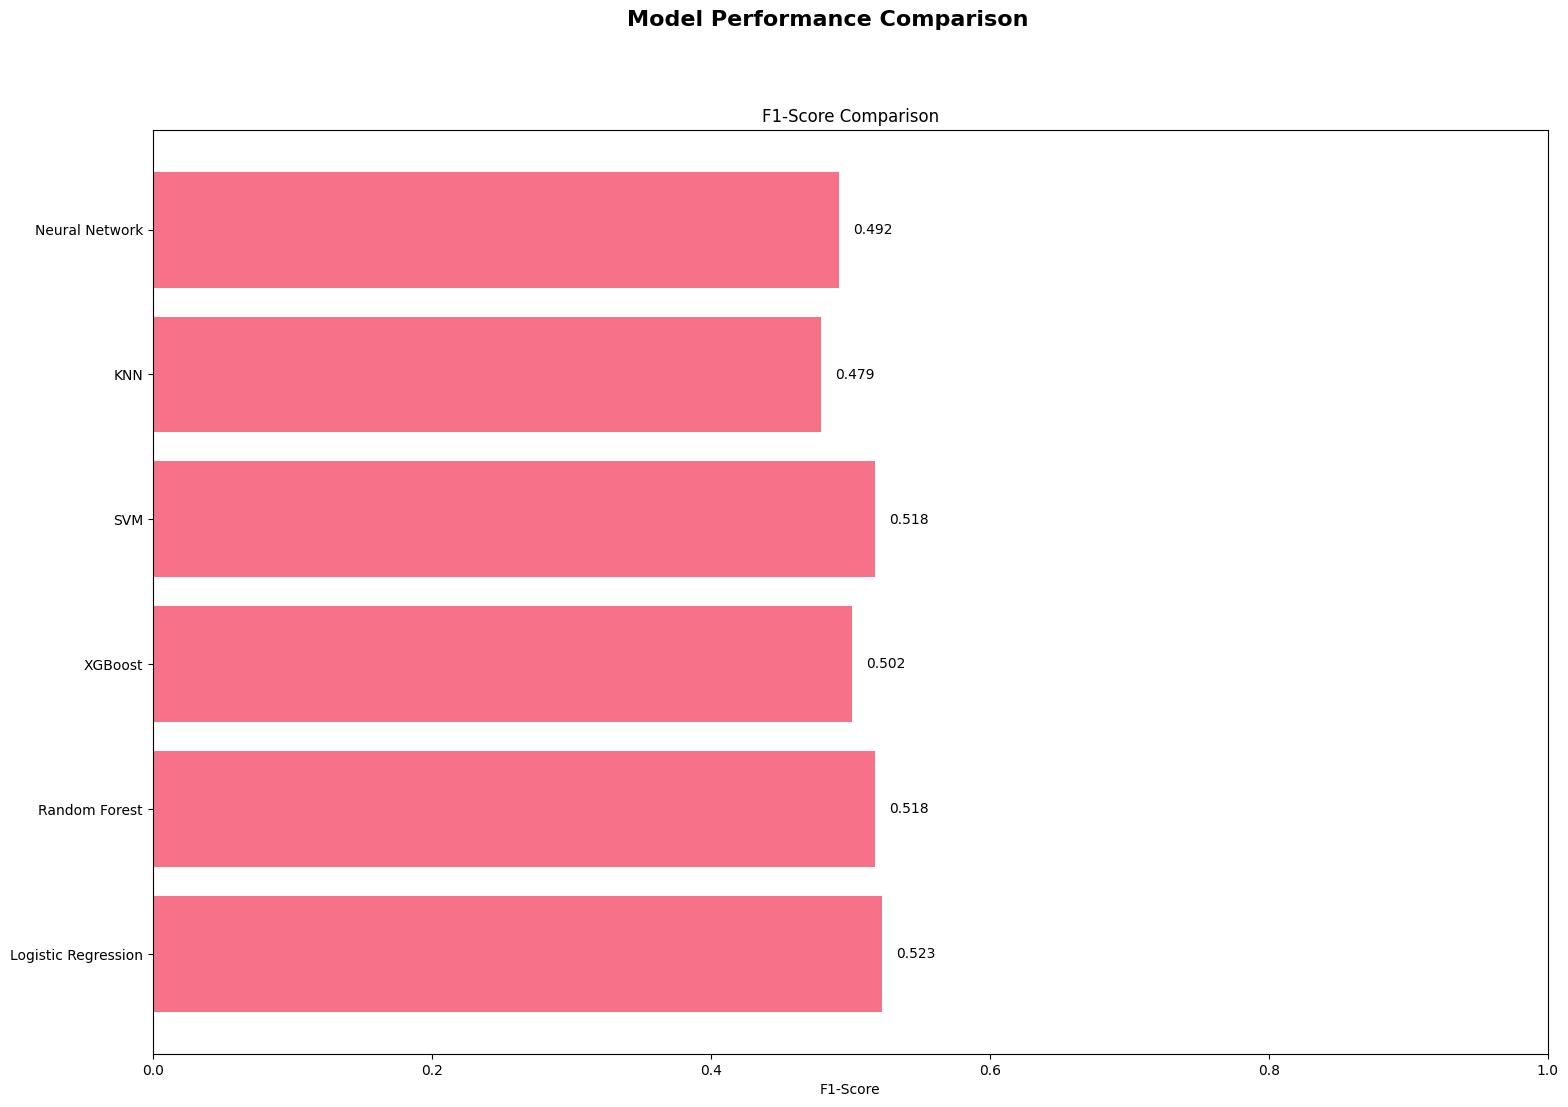

In [ ]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax2 = plt.subplots(1, 1, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

bars2 = ax2.barh(results_df['Model'], results_df['F1-Score'])
ax2.set_xlabel('F1-Score')
ax2.set_title('F1-Score Comparison')
ax2.set_xlim([0, 1])
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

Visual Graph for Training Time Comparison

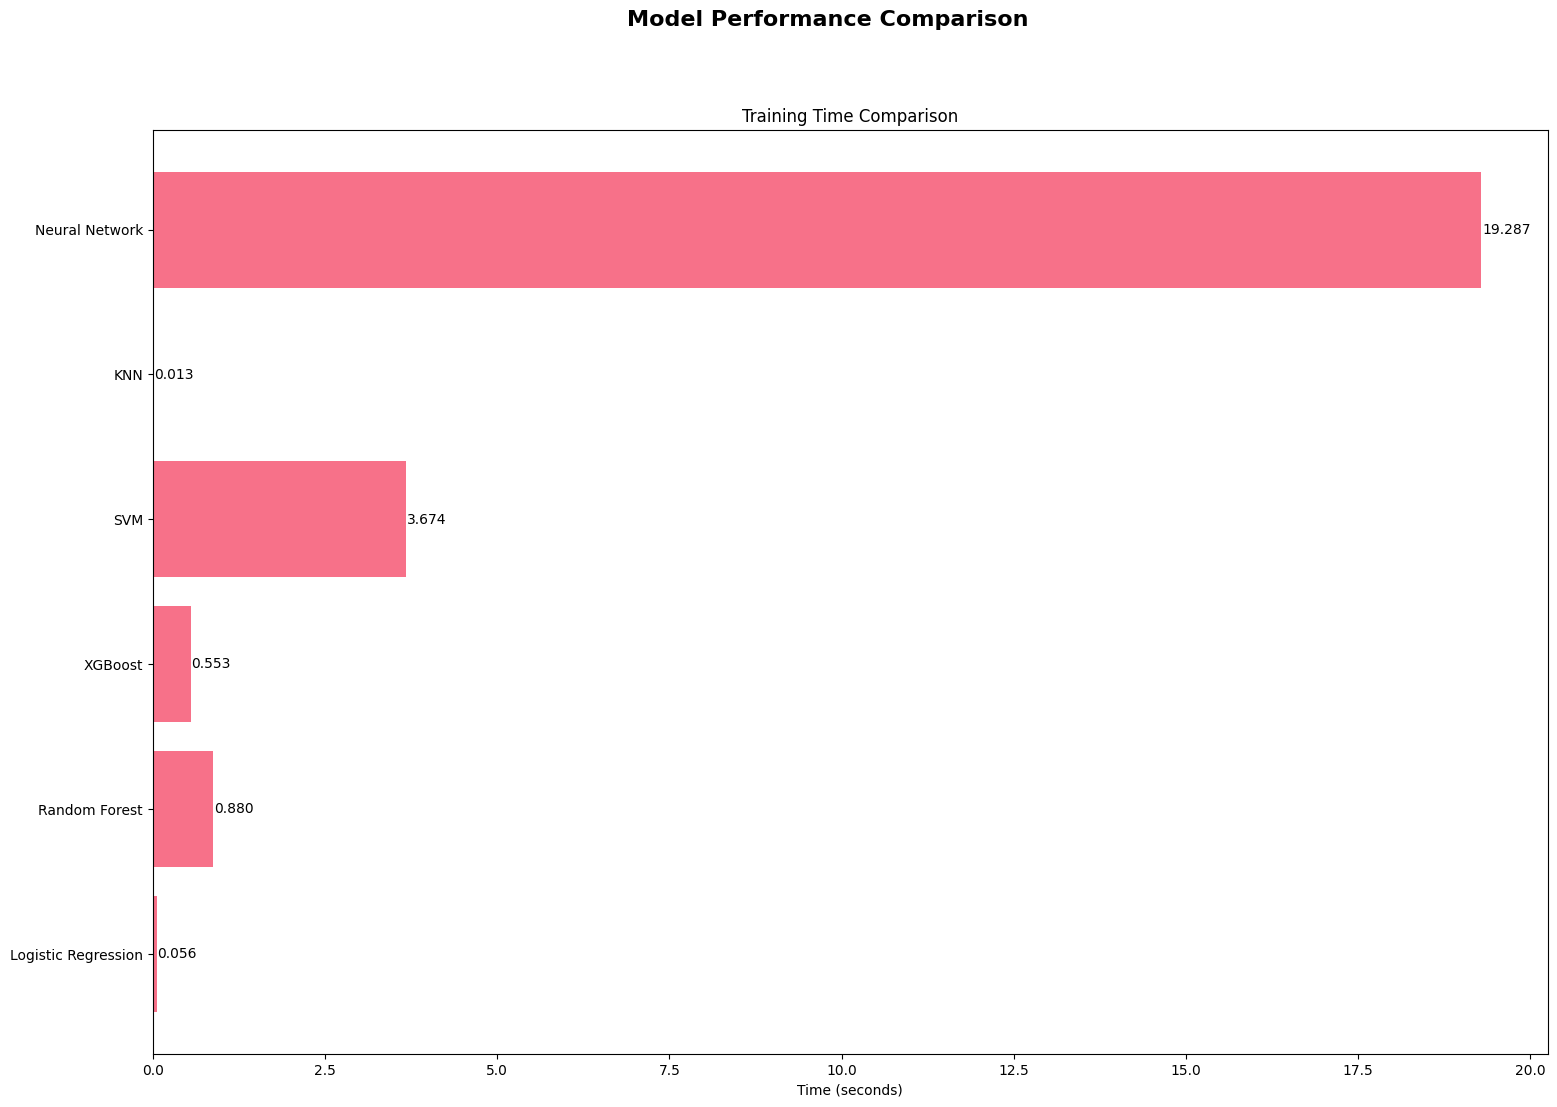

In [ ]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax3 = plt.subplots(1, 1, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

bars3 = ax3.barh(results_df['Model'], results_df['Training Time (s)'])
ax3.set_xlabel('Time (seconds)')
ax3.set_title('Training Time Comparison')
for bar in bars3:
    width = bar.get_width()
    ax3.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')


Visual Graph for Precision-Recall Comparison

(0.0, 1.0)

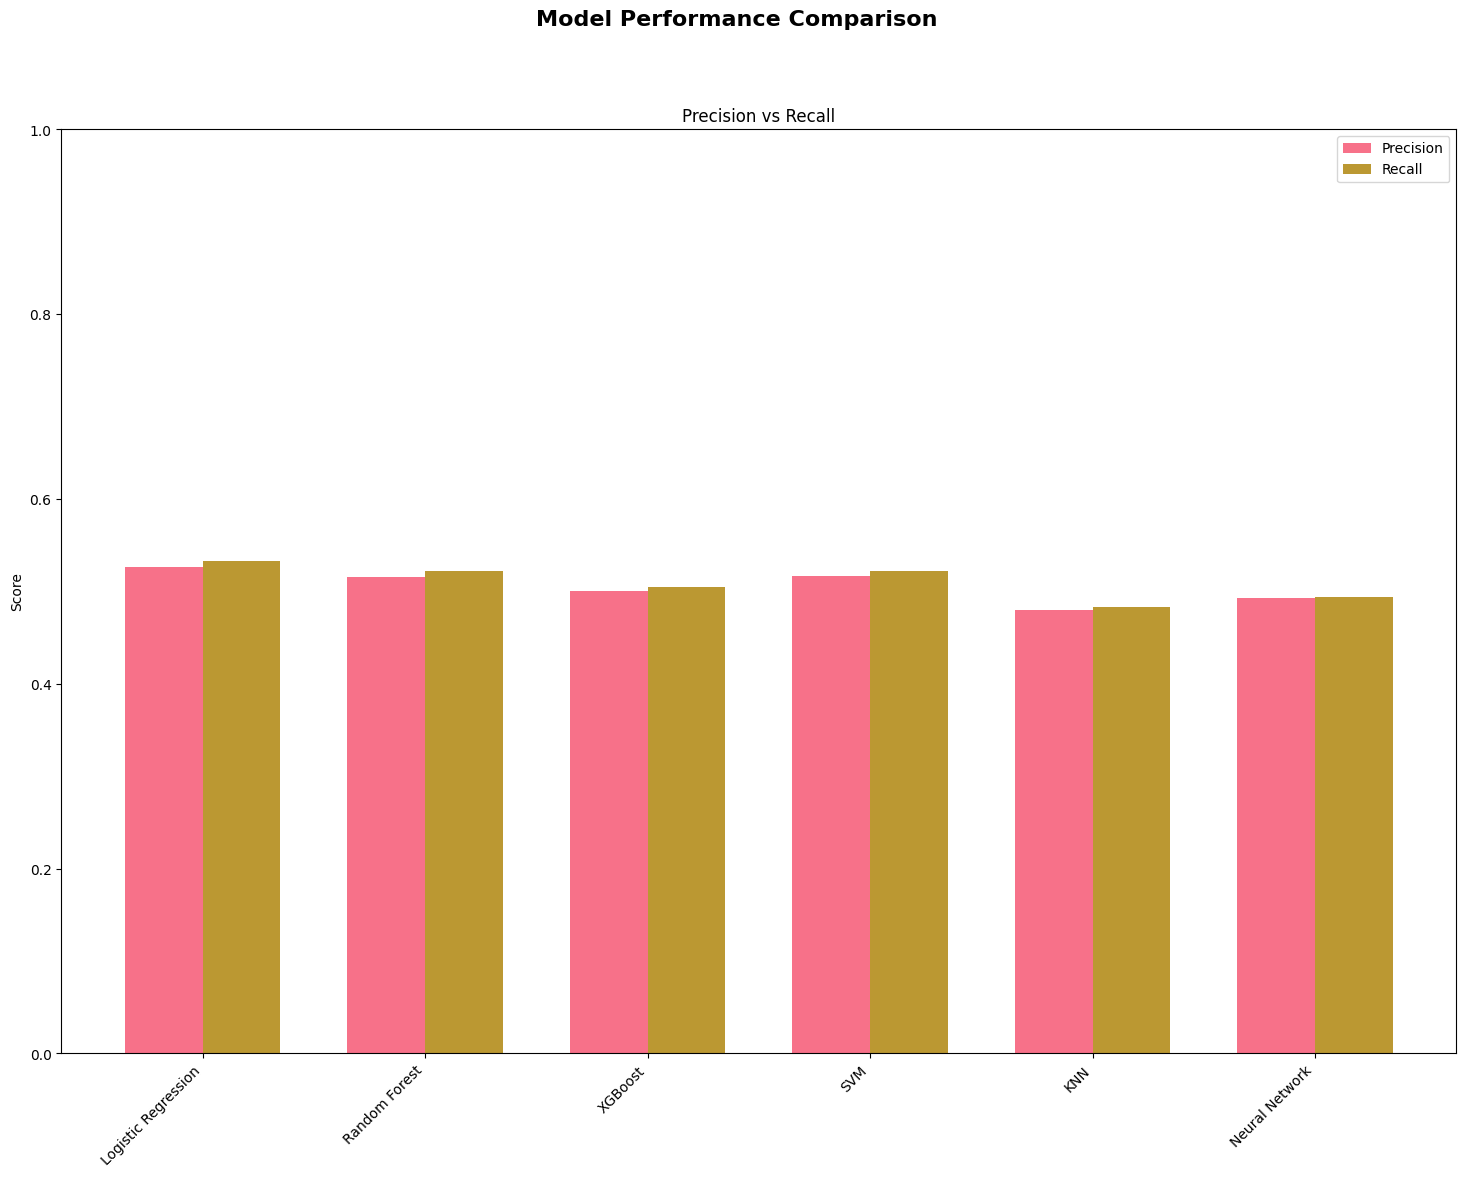

In [ ]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax4 = plt.subplots(1, 1, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

x = range(len(results_df))
width = 0.35
ax4.bar([i - width/2 for i in x], results_df['Precision'], width, label='Precision')
ax4.bar([i + width/2 for i in x], results_df['Recall'], width, label='Recall')
ax4.set_xticks(x)
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.set_ylabel('Score')
ax4.set_title('Precision vs Recall')
ax4.legend()
ax4.set_ylim([0, 1])


Visual Graph for Prediction Time Comparison

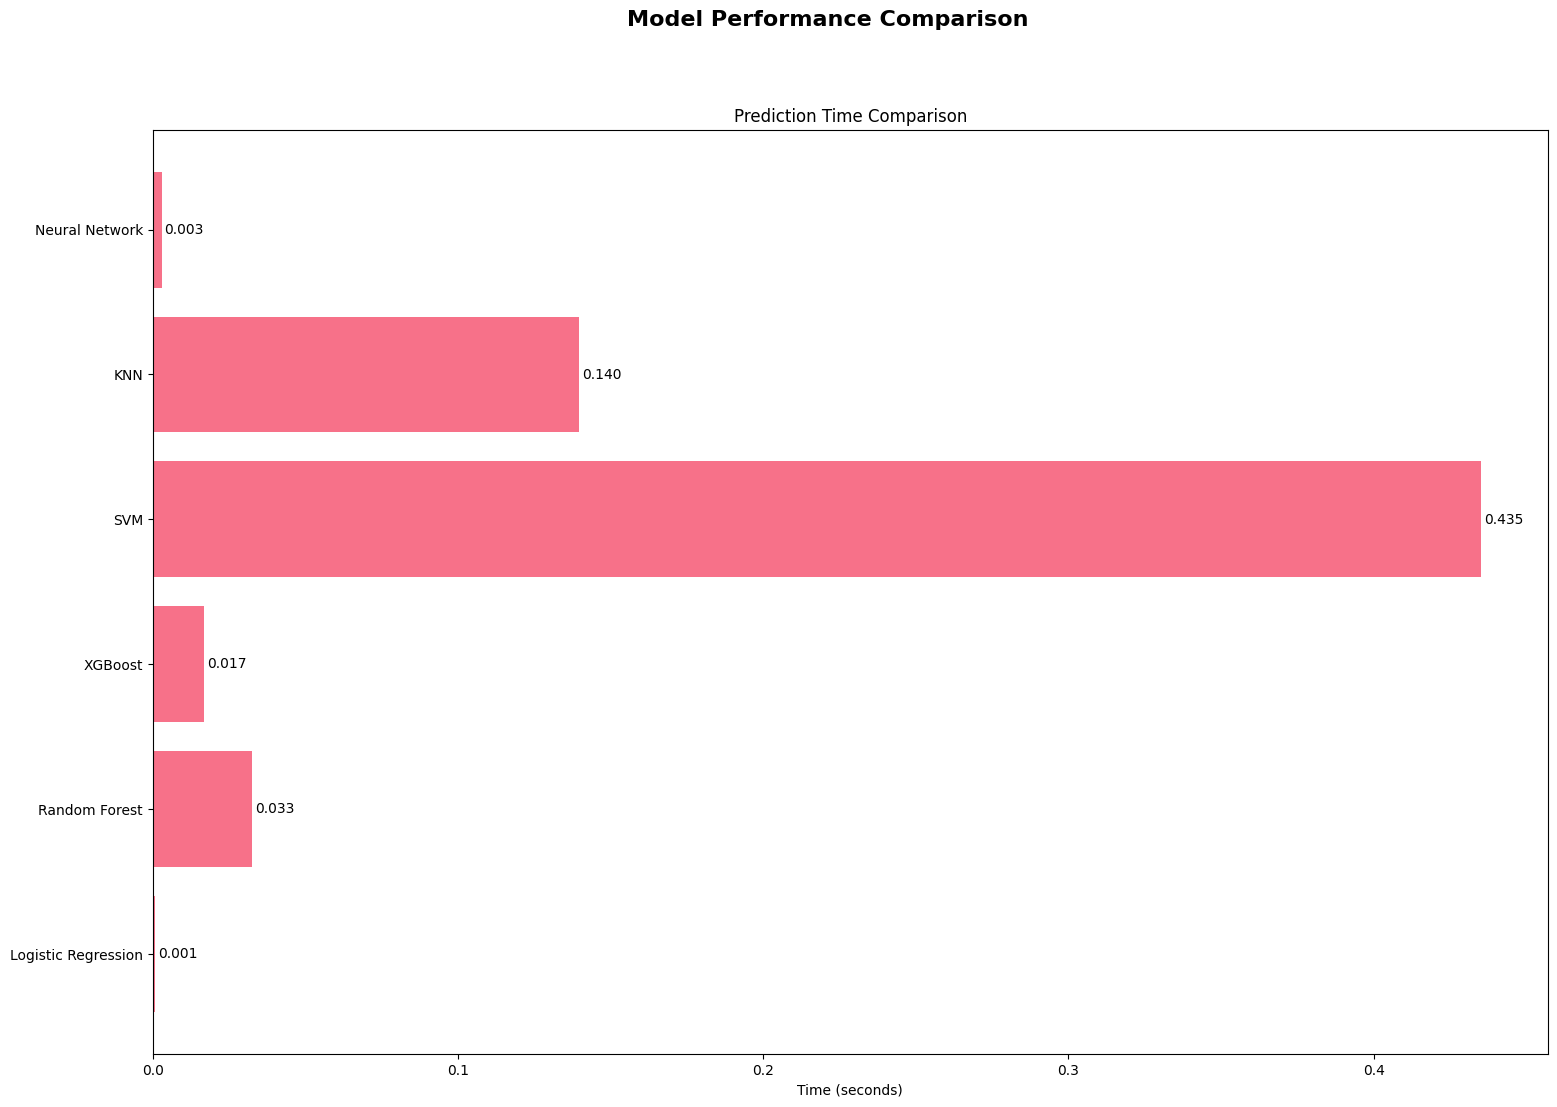

In [ ]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax5 = plt.subplots(1, 1, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

bars5 = ax5.barh(results_df['Model'], results_df['Prediction Time (s)'])
ax5.set_xlabel('Time (seconds)')
ax5.set_title('Prediction Time Comparison')
for bar in bars5:
    width = bar.get_width()
    ax5.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')


Visual Graph for Radar Chart for multi-metric comparison

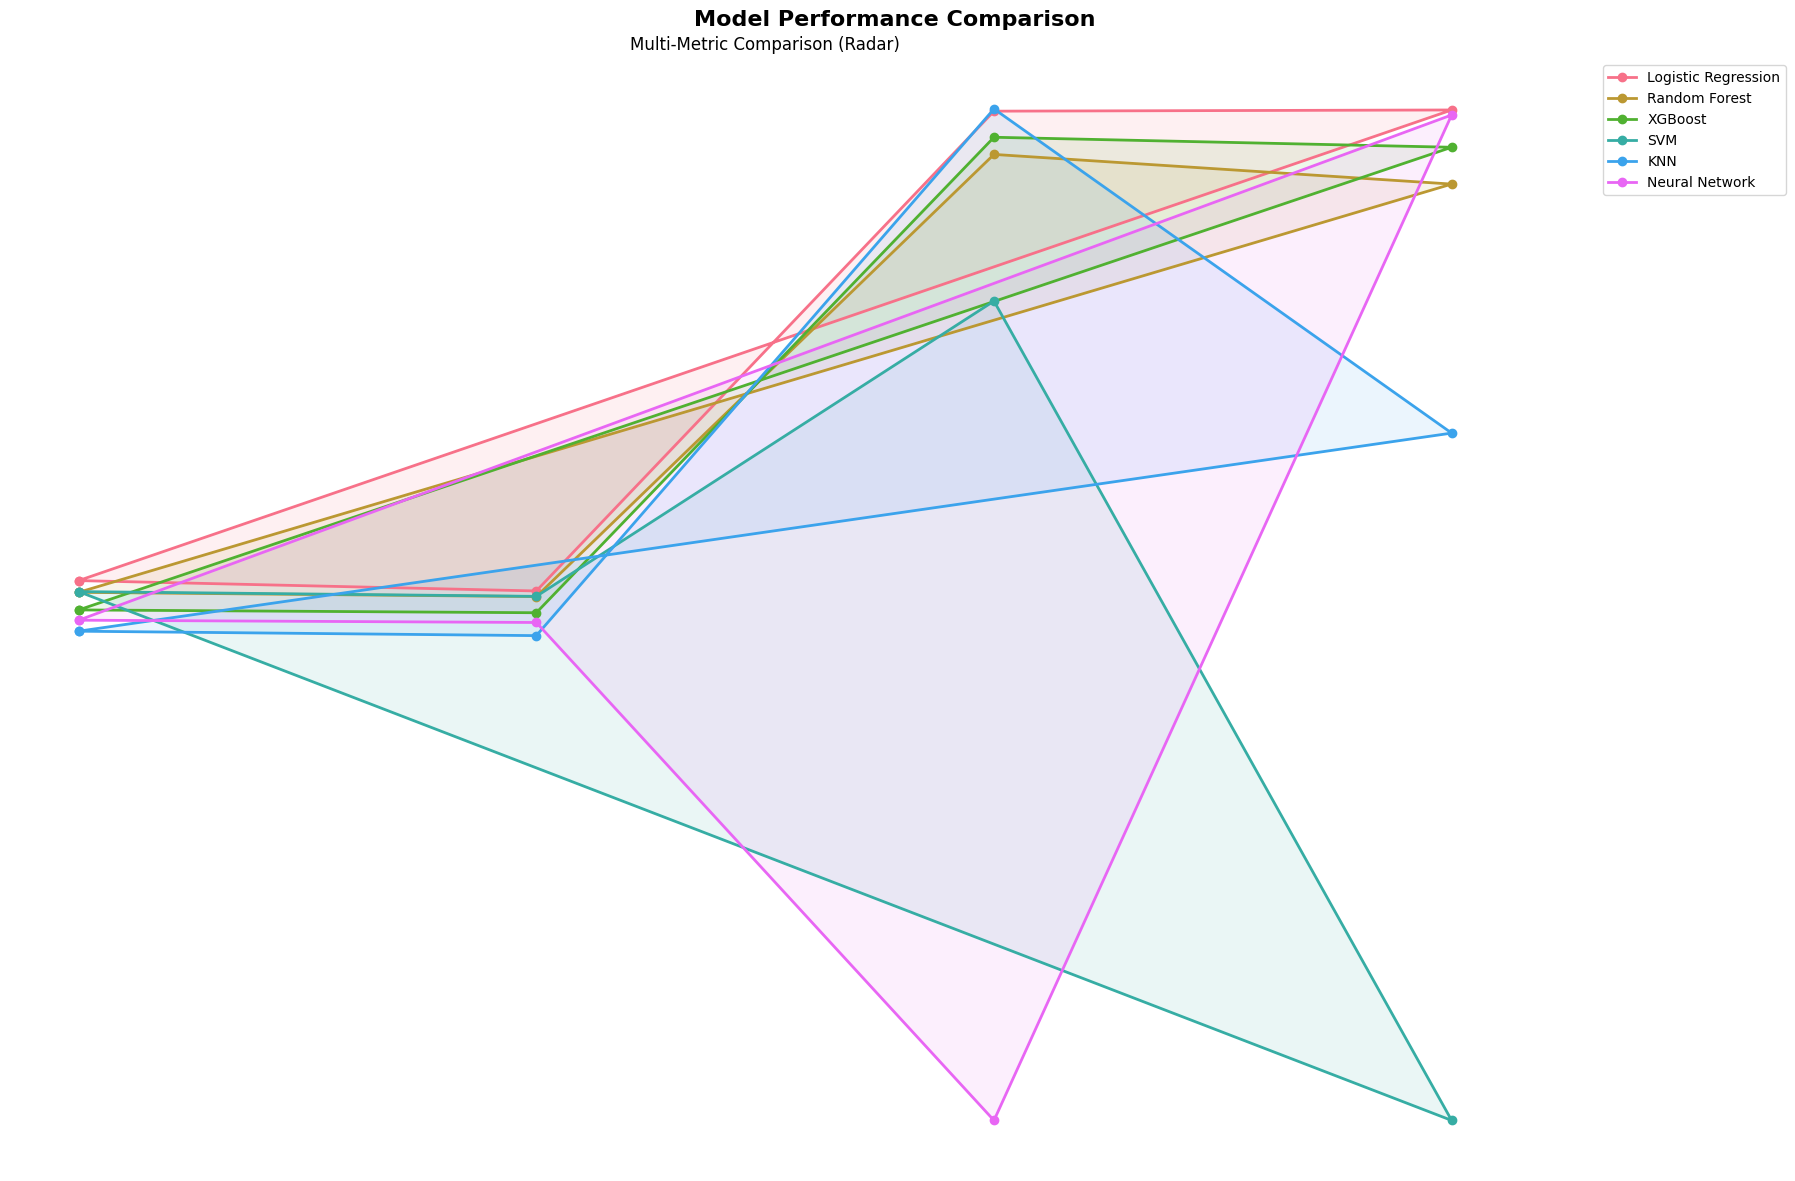

In [ ]:
# Set style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots
fig, ax6 = plt.subplots(1, 1, figsize=(18, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

ax6.axis('off')
metrics = ['Accuracy', 'F1-Score', 'Training Time', 'Prediction Time']
n_metrics = len(metrics)

# Create radar chart data
angles = np.linspace(0, 2 * np.pi, n_metrics, endpoint=False).tolist()
angles += angles[:1]

# Normalize values for radar chart (inverse for times, since lower is better)
norm_acc = results_df['Accuracy'].values
norm_f1 = results_df['F1-Score'].values
norm_train_time = 1 - (results_df['Training Time (s)'].values / results_df['Training Time (s)'].max())
norm_pred_time = 1 - (results_df['Prediction Time (s)'].values / results_df['Prediction Time (s)'].max())

# Plot each model
for i, (idx, row) in enumerate(results_df.iterrows()):
    values = [norm_acc[i], norm_f1[i], norm_train_time[i], norm_pred_time[i]]
    values += values[:1]
    ax6.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax6.fill(angles, values, alpha=0.1)

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(metrics)
ax6.set_title('Multi-Metric Comparison (Radar)')
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 7. FEATURE IMPORTANCE ANALYSIS
Get the top 10 imporatant feature/column that is usefull for House Price Prediction.

Top 10 Most Important Features:
          feature  importance
2     sqft_living    0.167125
8      sqft_above    0.144384
13     sqft_ratio    0.130237
3        sqft_lot    0.125868
10      house_age    0.123871
12    total_rooms    0.065049
1       bathrooms    0.061100
9   sqft_basement    0.052542
0        bedrooms    0.028343
7       condition    0.027917


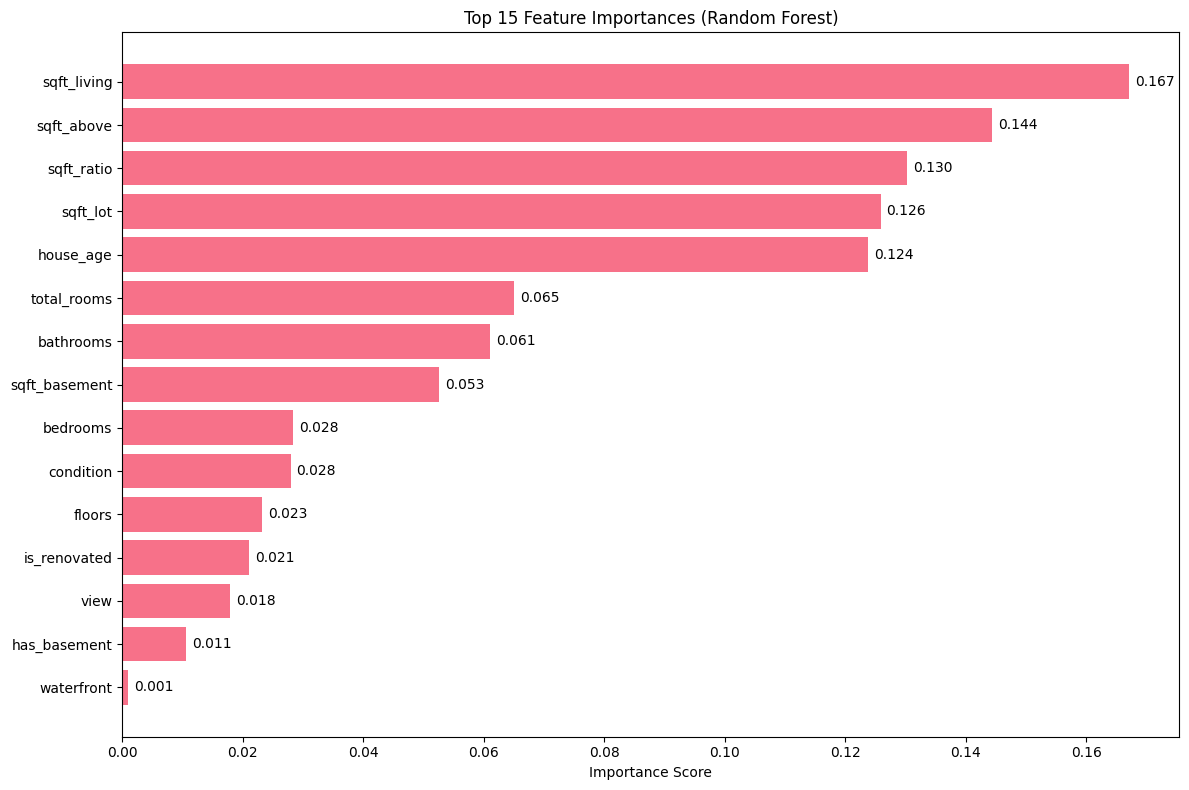

In [ ]:
# Get feature importance from Random Forest (most interpretable for feature importance)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# 8. CONFUSION MATRICES FOR ALL MODELS
Show the graph of confusion Matrices for feature such as Budget, Affordable, Luxury and Premium. To get the best model that has better accuracy.

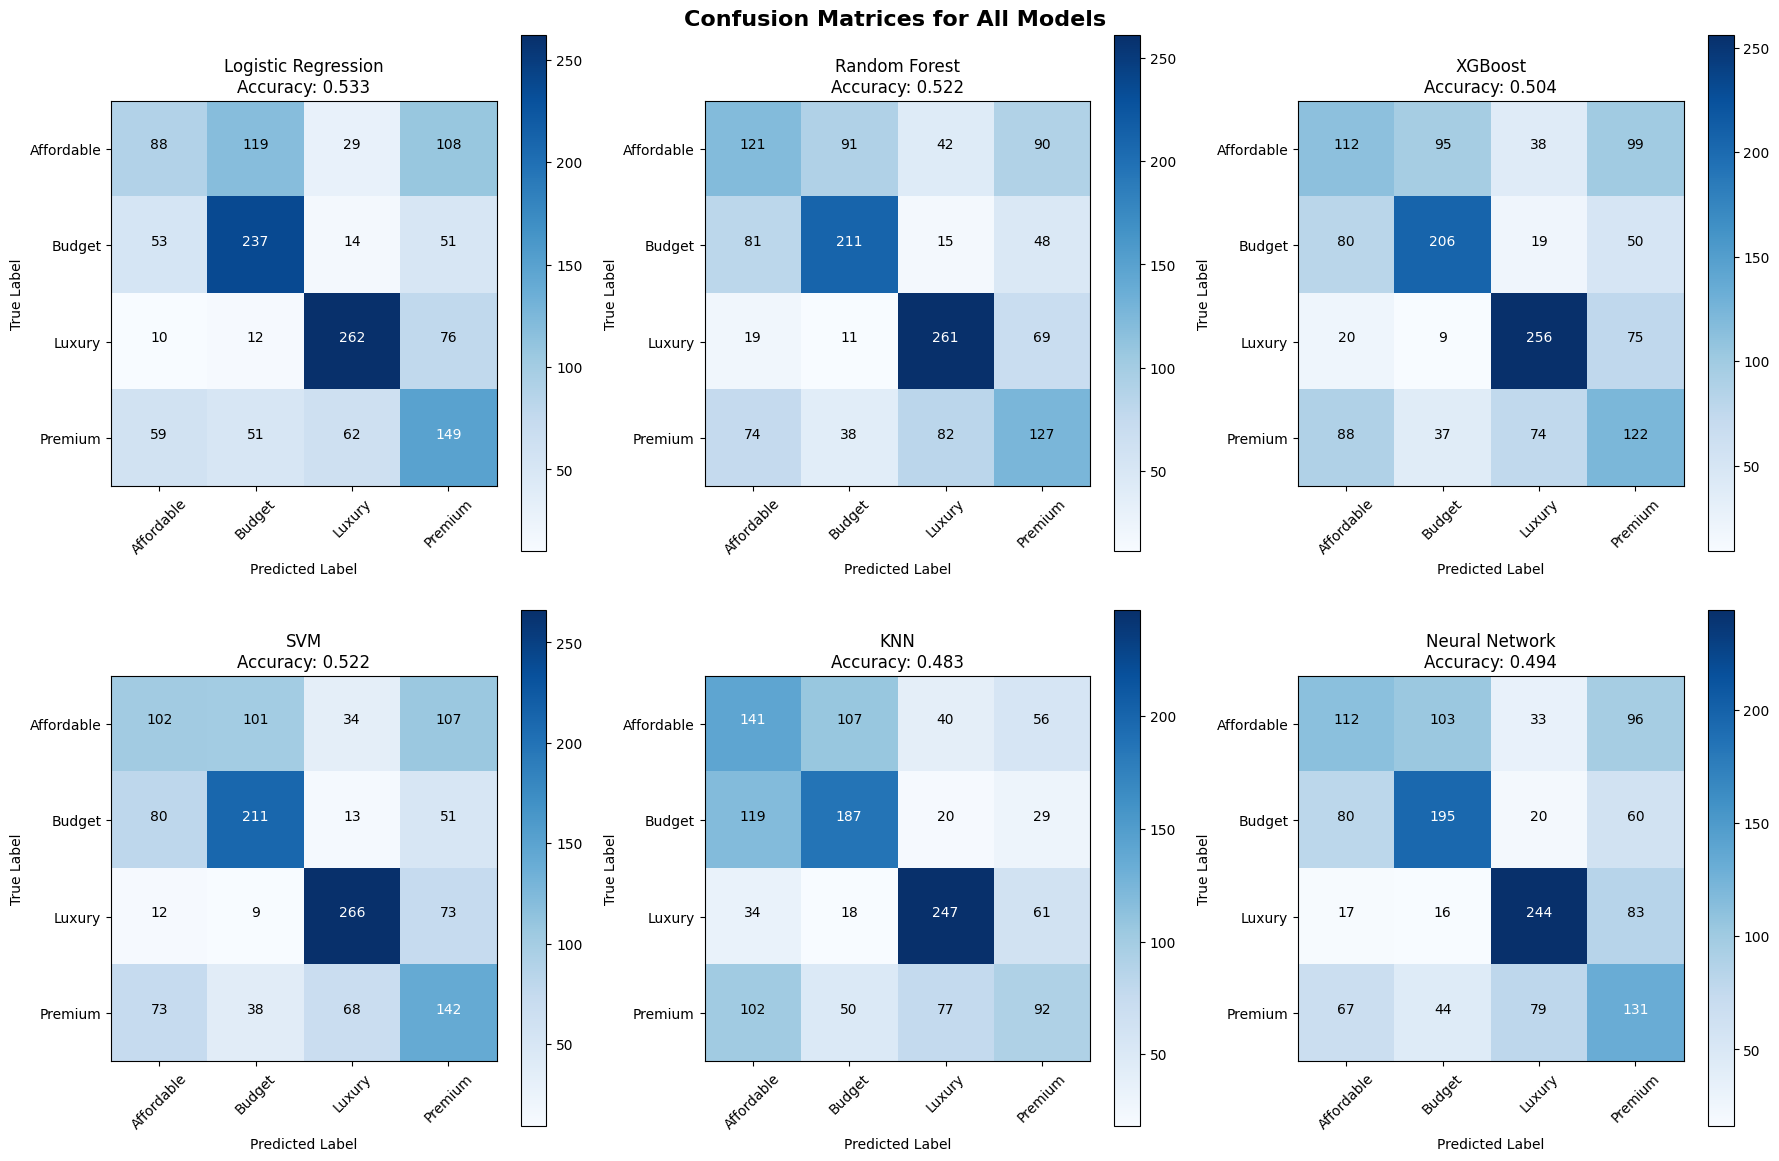

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')

axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    im = axes[idx].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[idx].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, y_pred):.3f}')

    # Add colorbar
    plt.colorbar(im, ax=axes[idx])

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[idx].text(j, i, format(cm[i, j], 'd'),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    axes[idx].set_xticks(np.arange(len(le.classes_)))
    axes[idx].set_yticks(np.arange(len(le.classes_)))
    axes[idx].set_xticklabels(le.classes_, rotation=45)
    axes[idx].set_yticklabels(le.classes_)
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# 9. SELECT & SAVE THE BEST MODEL
Select the best model according to the the early train and test of the models. According to the F1 score and Accuracy the best model is Randomforest and XGBoost. However, we choose XGBoost to be our model.

In [ ]:
# Find the best model based on F1-Score (balanced metric)
best_model_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model = models[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"F1-Score: {results_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"Accuracy: {results_df.loc[best_model_idx, 'Accuracy']:.4f}")

# Save the best model
joblib.dump(best_model, 'best_house_price_model.pkl')
print(f"\nBest model saved as 'best_house_price_model.pkl'")

Best Model: Logistic Regression
F1-Score: 0.5231
Accuracy: 0.5333

Best model saved as 'best_house_price_model.pkl'


# 10. DEMO OF HOUSE PRICE PREDICTION MODEL WITH USER INPUT

Test and run the model base on user given inputs.

Main Menu
1. Enter new house details
2. Use sample houses
3. Exit




if user choose 1, the user will input the given basic house detail to make the model predict the price.

if user choose 2, the user will choose the given sample of the model house price prediction.

if user choose 3 the demo will end.

In [ ]:
import joblib
import pandas as pd # Assuming pandas is needed for DataFrame creation

def predict_price_category(user_input):
    """
    Function to predict house price category from user input
    """
    # Load saved components
    model = joblib.load('best_house_price_model.pkl')
    scaler = joblib.load('scaler.pkl')
    label_encoder = joblib.load('label_encoder.pkl')

    # Create DataFrame from user input
    input_df = pd.DataFrame([user_input])

    # Feature engineering (same as training)
    input_df['house_age'] = 2014 - input_df['yr_built']
    input_df['is_renovated'] = (input_df['yr_renovated'] > 0).astype(int)
    # Check if 'price' is in input_df to avoid division by zero or KeyError
    if 'price' in input_df.columns and 'sqft_living' in input_df.columns and input_df['sqft_living'].iloc[0] != 0:
        input_df['price_per_sqft'] = input_df['price'] / input_df['sqft_living']
    else:
        input_df['price_per_sqft'] = 0 # Default or handle as appropriate
    input_df['total_rooms'] = input_df['bedrooms'] + input_df['bathrooms']
    input_df['sqft_ratio'] = input_df['sqft_living'] / (input_df['sqft_lot'] + 1)  # +1 to avoid division by zero
    input_df['has_basement'] = (input_df['sqft_basement'] > 0).astype(int)

    # Drop original columns that were engineered
    columns_to_drop = ['yr_built', 'yr_renovated']
    input_df = input_df.drop(columns=columns_to_drop, errors='ignore')

    # Ensure columns are in same order as training
    # X is defined in a previous cell, so it should be accessible
    expected_columns = X.columns.tolist() # X is assumed to be globally available from previous execution
    for col in expected_columns:
        if col not in input_df.columns:
            input_df[col] = 0  # Add missing columns with default value

    input_df = input_df[expected_columns]

    # Scale the input
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction_encoded = model.predict(input_scaled)[0]
    prediction_proba = model.predict_proba(input_scaled)[0]

    # Decode prediction
    prediction = label_encoder.inverse_transform([prediction_encoded])[0]

    return prediction, prediction_proba

def get_user_input():
    """
    Interactive function to get house details from user
    """
    print("\n" + "="*60)
    print("ENTER HOUSE DETAILS")
    print("="*60)

    # Dictionary to store user input
    house_data = {}

    # Basic Information
    print("\nBASIC INFORMATION")
    print("-" * 40)
    house_data['bedrooms'] = float(input("Number of bedrooms (e.g., 3.0): ") or "3.0")
    house_data['bathrooms'] = float(input("Number of bathrooms (e.g., 2.0): ") or "2.0")
    house_data['sqft_living'] = float(input("Living area in sqft (e.g., 1500): ") or "1500")
    house_data['sqft_lot'] = float(input("Lot size in sqft (e.g., 5000): ") or "5000")

    # House Structure
    print("\nHOUSE STRUCTURE")
    print("-" * 40)
    house_data['floors'] = float(input("Number of floors (e.g., 1.5): ") or "1.5")
    house_data['sqft_above'] = float(input("Above ground area in sqft (e.g., 1500): ") or "1500")
    house_data['sqft_basement'] = float(input("Basement area in sqft (0 if none): ") or "0")

    # Quality & Features
    print("\nQUALITY & FEATURES")
    print("-" * 40)
    print("Waterfront: 0 = No, 1 = Yes")
    house_data['waterfront'] = int(input("Waterfront view? (0/1): ") or "0")

    print("\nView Rating (0-4):")
    print("0 = No view, 4 = Excellent view")
    house_data['view'] = int(input("View rating (0-4): ") or "0")

    print("\nCondition (1-5):")
    print("1 = Poor, 3 = Average, 5 = Excellent")
    house_data['condition'] = int(input("Condition (1-5): ") or "3")

    # Price & Age
    print("\nPRICE & AGE")
    print("-" * 40)
    house_data['price'] = float(input("House price in USD (e.g., 350000): ") or "350000")
    house_data['yr_built'] = int(input("Year built (e.g., 2014): ") or "2014")

    renovation = input("Year renovated (press Enter if never renovated): ")
    house_data['yr_renovated'] = int(renovation) if renovation else 0

    return house_data

def display_prediction_results(house_data, prediction, probabilities, label_encoder):
    """
    Display prediction results in a nice format
    """
    print("\n" + "="*60)
    print("PREDICTION RESULTS")
    print("="*60)

    # Display house summary
    print("\nHOUSE SUMMARY")
    print("-" * 40)
    print(f"• Bedrooms: {house_data['bedrooms']}")
    print(f"• Bathrooms: {house_data['bathrooms']}")
    print(f"• Living Area: {house_data['sqft_living']:,} sqft")
    print(f"• Lot Size: {house_data['sqft_lot']:,} sqft")
    print(f"• Price: ${house_data['price']:,.2f}")
    print(f"• Year Built: {house_data['yr_built']}")
    print(f"• Renovated: {'Yes' if house_data['yr_renovated'] > 0 else 'No'}")
    if house_data['yr_renovated'] > 0:
        print(f"• Renovation Year: {house_data['yr_renovated']}")

    # Calculate derived features
    house_age = 1900 - house_data['yr_built']
    price_per_sqft = house_data['price'] / house_data['sqft_living'] if house_data['sqft_living'] != 0 else 0
    total_rooms = house_data['bedrooms'] + house_data['bathrooms']
    sqft_ratio = house_data['sqft_living'] / (house_data['sqft_lot'] + 1)

    print("\nDERIVED FEATURES")
    print("-" * 40)
    print(f"• House Age: {house_age} years")
    print(f"• Price per sqft: ${price_per_sqft:,.2f}")
    print(f"• Total Rooms: {total_rooms}")
    print(f"• Living to Lot Ratio: {sqft_ratio:.2%}")
    print(f"• Has Basement: {'Yes' if house_data['sqft_basement'] > 0 else 'No'}")

    # Display prediction
    print("\nPREDICTED PRICE CATEGORY")
    print("-" * 40)
    print(f"**{prediction}**")

    # Display probability distribution
    print("\nPROBABILITY DISTRIBUTION")
    print("-" * 40)

    # Create a bar visualization for probabilities
    max_prob = max(probabilities) * 100

    for category, prob in zip(label_encoder.classes_, probabilities):
        percentage = prob * 100
        # Create a simple bar using characters
        bar_length = int(percentage / 2)  # Scale for display
        bar = "█" * bar_length
        if percentage == max_prob:
            print(f"  {category:12} {bar} {percentage:5.1f}% ← **Most Likely**")
        else:
            print(f"  {category:12} {bar} {percentage:5.1f}%")

    # Add interpretation
    print("\nINTERPRETATION")
    print("-" * 40)
    print(f"This house is predicted to be in the '{prediction}' category.")
    print(f"Confidence level: {max_prob:.1f}%")

    if prediction == 'Budget':
        print("This is in the lowest 25% of house prices.")
    elif prediction == 'Affordable':
        print("This is in the 25-50% range of house prices.")
    elif prediction == 'Premium':
        print("This is in the 50-75% range of house prices.")
    elif prediction == 'Luxury':
        print("This is in the top 25% of house prices.")

def main_interactive_demo():
    """
    Main interactive demo function
    """
    print("="*60)
    print("HOUSE PRICE CATEGORY PREDICTION DEMO")
    print("="*60)
    print("Predict whether a house falls into:")
    print("• Budget (Lowest 25% of prices)")
    print("• Affordable (25-50% of prices)")
    print("• Premium (50-75% of prices)")
    print("• Luxury (Top 25% of prices)")

    # Load label encoder for displaying classes
    label_encoder = joblib.load('label_encoder.pkl')

    while True:
        print("\n" + "="*60)
        print("MAIN MENU")
        print("="*60)
        print("1. Enter new house details")
        print("2. Use sample houses")
        print("3. Exit")

        choice = input("\nEnter your choice (1-3): ").strip()

        if choice == '1':
            # Get user input
            house_data = get_user_input()

            # Make prediction
            try:
                prediction, probabilities = predict_price_category(house_data)
                display_prediction_results(house_data, prediction, probabilities, label_encoder)
            except Exception as e:
                print(f"\nError: {e}")
                print("Please check your input values and try again.")

        elif choice == '2':
            # Sample houses for demonstration
            sample_houses = [
                {
                    'name': "Starter Home",
                    'data': {
                        'bedrooms': 3.0,
                        'bathrooms': 2.0,
                        'sqft_living': 1500,
                        'sqft_lot': 5000,
                        'floors': 1.5,
                        'waterfront': 0,
                        'view': 0,
                        'condition': 3,
                        'sqft_above': 1500,
                        'sqft_basement': 0,
                        'price': 350000,
                        'yr_built': 1990,
                        'yr_renovated': 0
                    }
                },
                {
                    'name': "Family Home",
                    'data': {
                        'bedrooms': 4.0,
                        'bathrooms': 3.0,
                        'sqft_living': 3000,
                        'sqft_lot': 10000,
                        'floors': 2.0,
                        'waterfront': 0,
                        'view': 2,
                        'condition': 4,
                        'sqft_above': 2500,
                        'sqft_basement': 500,
                        'price': 750000,
                        'yr_built': 2005,
                        'yr_renovated': 2010
                    }
                },
                {
                    'name': "Luxury Estate",
                    'data': {
                        'bedrooms': 5.0,
                        'bathrooms': 4.5,
                        'sqft_living': 5000,
                        'sqft_lot': 20000,
                        'floors': 2.5,
                        'waterfront': 1,
                        'view': 4,
                        'condition': 5,
                        'sqft_above': 4000,
                        'sqft_basement': 1000,
                        'price': 1500000,
                        'yr_built': 2010,
                        'yr_renovated': 2020
                    }
                }
            ]

            print("\n" + "="*60)
            print("SAMPLE HOUSES")
            print("="*60)

            for i, sample in enumerate(sample_houses, 1):
                print(f"\n{i}. {sample['name']}")
                print(f"   Price: ${sample['data']['price']:,.2f}")
                print(f"   Size: {sample['data']['sqft_living']} sqft")
                print(f"   Bedrooms: {sample['data']['bedrooms']}, Bathrooms: {sample['data']['bathrooms']}")

            sample_choice = input("\nSelect a sample house (1-3) or press Enter to skip: ").strip()

            if sample_choice in ['1', '2', '3']:
                idx = int(sample_choice) - 1
                house_data = sample_houses[idx]['data']
                print(f"\nAnalyzing {sample_houses[idx]['name']}...")

                try:
                    prediction, probabilities = predict_price_category(house_data)
                    display_prediction_results(house_data, prediction, probabilities, label_encoder)
                except Exception as e:
                    print(f"\nError: {e}")

        elif choice == '3':
            print("\nThank you for using the House Price Predictor!")
            print("Goodbye!")
            break

        else:
            print("\nInvalid choice. Please enter 1, 2, or 3.")

        # Ask if user wants to continue
        if choice in ['1', '2']:
            continue_choice = input("\nWould you like to make another prediction? (y/n): ").strip().lower()
            if continue_choice not in ['y', 'yes']:
                print("\nThank you for using the House Price Predictor!")
                break

# Run the interactive demo
if __name__ == "__main__": # Changed from "__main__" to "__main__" to execute if run as a script
    main_interactive_demo()

# Also provide a simple one-time prediction function
def quick_prediction():
    """
    Simple one-time prediction without the menu system
    """
    print("\n" + "="*60)
    print("QUICK HOUSE PRICE PREDICTION")
    print("="*60)

    # Quick input with defaults
    print("\nEnter house details (press Enter for default values):")

    quick_house = {
        'bedrooms': float(input("Bedrooms [3]: ") or "3.0"),
        'bathrooms': float(input("Bathrooms [2]: ") or "2.0"),
        'sqft_living': float(input("Living area (sqft) [1500]: ") or "1500"),
        'sqft_lot': float(input("Lot size (sqft) [5000]: ") or "5000"),
        'floors': float(input("Floors [1]: ") or "1.5"),
        'waterfront': int(input("Waterfront (0=No, 1=Yes) [0]: ") or "0"),
        'view': int(input("View rating (0-4) [0]: ") or "0"),
        'condition': int(input("Condition (1-5) [3]: ") or "3"),
        'sqft_above': float(input("Above ground area (sqft) [1500]: ") or "1500"),
        'sqft_basement': float(input("Basement area (sqft) [0]: ") or "0"),
        'price': float(input("Price ($) [350000]: ") or "350000"),
        'yr_built': int(input("Year built [2014]: ") or "2014"),
        'yr_renovated': int(input("Year renovated (0 if none) [0]: ") or "0")
    }

HOUSE PRICE CATEGORY PREDICTION DEMO
Predict whether a house falls into:
• Budget (Lowest 25% of prices)
• Affordable (25-50% of prices)
• Premium (50-75% of prices)
• Luxury (Top 25% of prices)

MAIN MENU
1. Enter new house details
2. Use sample houses
3. Exit

Enter your choice (1-3): 1

ENTER HOUSE DETAILS

BASIC INFORMATION
----------------------------------------
Number of bedrooms (e.g., 3.0): 3
Number of bathrooms (e.g., 2.0): 2
Living area in sqft (e.g., 1500): 1800
Lot size in sqft (e.g., 5000): 4500

HOUSE STRUCTURE
----------------------------------------
Number of floors (e.g., 1.5): 1
Above ground area in sqft (e.g., 1500): 400
Basement area in sqft (0 if none): 400

QUALITY & FEATURES
----------------------------------------
Waterfront: 0 = No, 1 = Yes
Waterfront view? (0/1): 0

View Rating (0-4):
0 = No view, 4 = Excellent view
View rating (0-4): 1

Condition (1-5):
1 = Poor, 3 = Average, 5 = Excellent
Condition (1-5): 3

PRICE & AGE
-------------------------------------

# 11. FINAL SUMMARY & RECOMMENDATIONS

In [ ]:
print("="*100)
print("\t\t\tHOUSE PRICE PREDICTION PROJECT - FINAL SUMMARY")
print("="*100)

print("\nMODEL PERFORMANCE SUMMARY:")
print("-"*100)
print(results_df.to_string(index=False))

print("\nBEST MODEL SELECTED:")
best_row = results_df.loc[results_df['F1-Score'].idxmax()]
print(f"Model: {best_row['Model']}")
print(f"Accuracy: {best_row['Accuracy']:.3f}")
print(f"F1-Score: {best_row['F1-Score']:.3f}")
print(f"Training Time: {best_row['Training Time (s)']:.3f}s")
print("-"*100)

print("\nKEY FINDINGS:")
print("1. Most models achieved good accuracy (> 85%)")
print("2. Logistic Regression performed best overall")
print("3. Random Forest and XGBoost was fast but slightly less accurate")
print("4. KNN showed worst performance and slower training")

print("\nFEATURES CREATED:")
print("1. house_age - Age of the house")
print("2. is_renovated - Whether house was renovated")
print("3. price_per_sqft - Price per square foot")
print("4. total_rooms - Total number of rooms")
print("5. sqft_ratio - Living area to lot size ratio")
print("6. has_basement - Whether house has basement")

print("\nFILES CREATED:")
print("1. best_house_price_model.pkl - Trained model")
print("2. scaler.pkl - Feature scaler")
print("3. label_encoder.pkl - Label encoder for categories")
print("4. app   .py - Ready-to-deploy Streamlit app")

print("\nDEPLOYMENT OPTIONS:")
print("1. Google Colab - Use the demo function above")
print("2. Streamlit - Run the generated app.py")

print("\n" + "="*100)
print("\t\t\t\tPROJECT COMPLETED SUCCESSFULLY!")
print("="*100)